### Problem Statement: Mutual Information Regression
I have Write a Python script that performs model-based feature selection using Mutual Information
Regression on the "Housing" dataset which is downloaded from Kaggle

In [1]:
%matplotlib inline

#### ● Load the dataset using the pandas library or any other suitable method.

In [42]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
HousingDataFrame = pd.read_csv("data/housing.csv")
HousingDataFrame.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
HousingDataFrame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
HousingDataFrame.drop('Id', inplace = True, axis = 1)

In [7]:
HousingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### ● Apply necessary processing on it (Hint : label_encoding , null value handling)

In [8]:
# Perform Null values handling on object, int, and float columns

<Axes: >

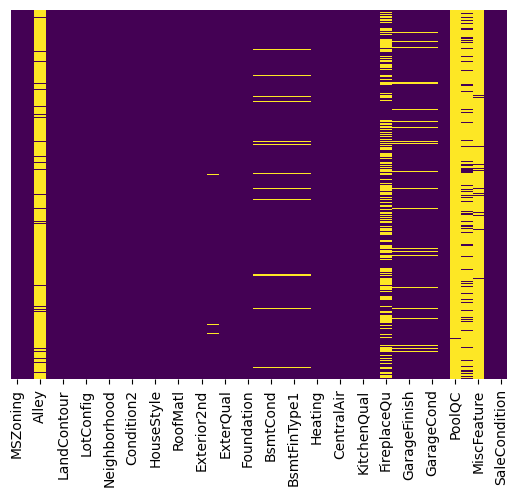

In [9]:
sns.heatmap(HousingDataFrame.select_dtypes(include = ['object']).isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
# representation of object columns null values using heatmap

In [10]:
# Iterate through all object columns, and then replace null values with mode....
for column in HousingDataFrame.select_dtypes(include=['object']).columns:  
    # Check if the column has null values
    if HousingDataFrame[column].isnull().sum() > 0:
        # Calculate the mode
        mode_value = HousingDataFrame[column].mode()[0]
        # Replace null values with the mode
        HousingDataFrame[column].fillna(mode_value, inplace=True)
        

In [11]:
# thus all null values are replaced by mode, and give us 0 null values count
HousingDataFrame.select_dtypes(include = ['object']).isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

<Axes: >

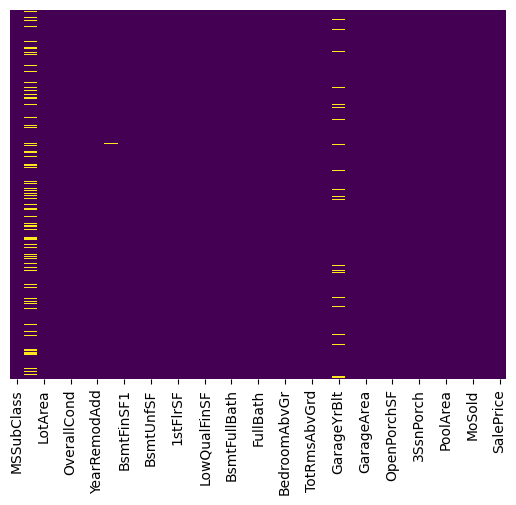

In [12]:
sns.heatmap(HousingDataFrame.select_dtypes(include = ['int','float']).isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
# representation of int, float columns null values using heatmap

In [13]:
# Iterate through all int, float columns, and then replace null values with mean....
for column in HousingDataFrame.select_dtypes(include=['int','float']).columns:  
    # Check if the column has null values
    if HousingDataFrame[column].isnull().sum() > 0:
        # Calculate the mean
        mean_value = HousingDataFrame[column].mean()
        # Replace null values with the mean
        HousingDataFrame[column].fillna(mean_value, inplace=True)

In [14]:
# thus all null values are replaced by mean, and give us 0 null values count
HousingDataFrame.select_dtypes(include = ['int','float']).isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [15]:
# perform label encoding on object column values 
housing_object_column_data = HousingDataFrame.select_dtypes(include = 'object')

In [16]:
housing_object_column_array_data = housing_object_column_data.values

In [19]:

for i in range(housing_object_column_array_data.shape[1]): 
    le = LabelEncoder()
    Unique_labels = set(housing_object_column_array_data[:,i])
    Unique_labels = list(Unique_labels)
    Unique_labels = np.array(Unique_labels)
    le.fit(Unique_labels)
    housing_object_column_array_data[:,i] = le.transform(housing_object_column_array_data[:,i])

In [20]:
housing_object_column_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [21]:
for colname in housing_object_column_data.columns:
    housing_object_column_data[colname] = housing_object_column_data[colname].astype(int)

In [22]:
housing_object_column_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   Street         1460 non-null   int64
 2   Alley          1460 non-null   int64
 3   LotShape       1460 non-null   int64
 4   LandContour    1460 non-null   int64
 5   Utilities      1460 non-null   int64
 6   LotConfig      1460 non-null   int64
 7   LandSlope      1460 non-null   int64
 8   Neighborhood   1460 non-null   int64
 9   Condition1     1460 non-null   int64
 10  Condition2     1460 non-null   int64
 11  BldgType       1460 non-null   int64
 12  HouseStyle     1460 non-null   int64
 13  RoofStyle      1460 non-null   int64
 14  RoofMatl       1460 non-null   int64
 15  Exterior1st    1460 non-null   int64
 16  Exterior2nd    1460 non-null   int64
 17  MasVnrType     1460 non-null   int64
 18  ExterQual      1460 non-null   int64
 19  ExterC

In [23]:
# fetch only int and float columns 
Housing_int_float_column_data = HousingDataFrame.select_dtypes(include = [int, float])
Housing_int_float_column_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [24]:
# concatinate 2 different dataframes of Housing data into 1... after preforming necessary 
# data preprocessing steps., to form final dataset...
FinalHousingDataFrame = pd.concat([Housing_int_float_column_data, 
                                   housing_object_column_data], axis =1)
FinalHousingDataFrame

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,1,4,4,2,2,2,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,1,4,4,2,2,2,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,1,4,4,2,2,2,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,5,2,4,4,2,2,2,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,1,4,4,2,2,2,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,2,4,4,2,2,2,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,1,4,4,2,2,0,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,2,4,4,2,2,2,2,8,4


####  ● Separate the features (X) and the target variable (y : Price of the house) from the dataset.

In [25]:
# Then perform Mutual information Regression on Final dataset.. 

In [26]:
X_MIR_Housing = FinalHousingDataFrame.drop('SalePrice', axis = 1).values
X_MIR_Housing

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 2.000e+00, 8.000e+00,
        4.000e+00]])

In [27]:
Y_MIR_Housing = FinalHousingDataFrame['SalePrice']
Y_MIR_Housing

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [28]:
MIRObj = mutual_info_regression(X_MIR_Housing, Y_MIR_Housing)
MIRObj

array([2.81313856e-01, 1.97660732e-01, 1.60028304e-01, 5.48922106e-01,
       1.01999837e-01, 3.65047471e-01, 2.47453136e-01, 8.88673921e-02,
       1.50695091e-01, 1.41963045e-02, 1.19382322e-01, 3.67149207e-01,
       3.08821196e-01, 2.09143724e-01, 5.84087552e-03, 4.83328621e-01,
       2.70727292e-02, 1.42689294e-02, 2.52937972e-01, 9.29446272e-02,
       7.48138803e-02, 1.77985655e-02, 2.06036136e-01, 1.66791831e-01,
       2.85284439e-01, 3.73308927e-01, 3.61950521e-01, 1.10954148e-01,
       1.40091676e-01, 2.19943080e-02, 0.00000000e+00, 2.77065012e-02,
       4.25746773e-04, 2.36407349e-03, 0.00000000e+00, 0.00000000e+00,
       1.17741639e-01, 2.27990911e-03, 6.71147098e-03, 9.36232754e-02,
       2.87433169e-02, 1.17939449e-03, 2.44326442e-02, 0.00000000e+00,
       5.11271187e-01, 2.91556740e-02, 2.93011649e-03, 4.43432132e-02,
       9.51050811e-02, 8.62466669e-03, 1.61214085e-02, 1.35738338e-01,
       1.69440143e-01, 9.75560984e-02, 3.46911868e-01, 9.98090024e-03,
      

In [29]:
housing_MIR_Series_obj  = pd.Series(MIRObj)
housing_MIR_Series_obj

0     0.281314
1     0.197661
2     0.160028
3     0.548922
4     0.102000
        ...   
74    0.023301
75    0.002874
76    0.014287
77    0.080593
78    0.062708
Length: 79, dtype: float64

In [30]:
FinalHousingDataFrame.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'El

In [31]:
Independent_Housing_var_names = FinalHousingDataFrame.columns[:-1]
Independent_Housing_var_names

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'El

In [32]:
housing_MIR_Series_obj.index = Independent_Housing_var_names

In [33]:
housing_MIR_Series_obj.sort_values(ascending=False)

OverallQual     0.548922
LandSlope       0.511271
GrLivArea       0.483329
GarageCars      0.373309
TotalBsmtSF     0.367149
                  ...   
LotConfig       0.000000
GarageFinish    0.000000
MoSold          0.000000
3SsnPorch       0.000000
YrSold          0.000000
Length: 79, dtype: float64

In [34]:
housing_mir_scores = pd.DataFrame({'Features':housing_MIR_Series_obj.index,'mir_scores':housing_MIR_Series_obj.values })

In [35]:
housing_mir_scores

,Features,mir_scores
0,MSSubClass,0.281314
1,LotFrontage,0.197661
2,LotArea,0.160028
3,OverallQual,0.548922
4,OverallCond,0.102000
...,...,...
74,PavedDrive,0.023301
75,PoolQC,0.002874
76,Fence,0.014287
77,MiscFeature,0.080593


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, 'MSSubClass'),
  Text(1, 0, 'LotFrontage'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'OverallQual'),
  Text(4, 0, 'OverallCond'),
  Text(5, 0, 'YearBuilt'),
  Text(6, 0, 'YearRemodAdd'),
  Text(7, 0, 'MasVnrArea'),
  Text(8, 0, 'BsmtFinSF1'),
  Text(9, 0, 'BsmtFinSF2'),
  Text(10, 0, 'BsmtUnfSF'),
  Text(11, 0, 'TotalBsmtSF'),
  Text(12, 0, '1stFlrSF'),
  Text(13, 0, '2ndFlrSF'),
  Text(14, 0, 'LowQualFinSF'),
  Text(15, 0, 'GrLivArea'),
  Text(16, 0, 'BsmtFullBath'),
  Text(17, 0, 'BsmtHalfBath'),
  Text(18, 0, 'FullBath'),
  Text(19, 0, 'HalfBath'),
  Text(20, 0, 'BedroomAbvGr'),
  Text(21, 0, 'KitchenAbvGr'),
  Text(22, 0

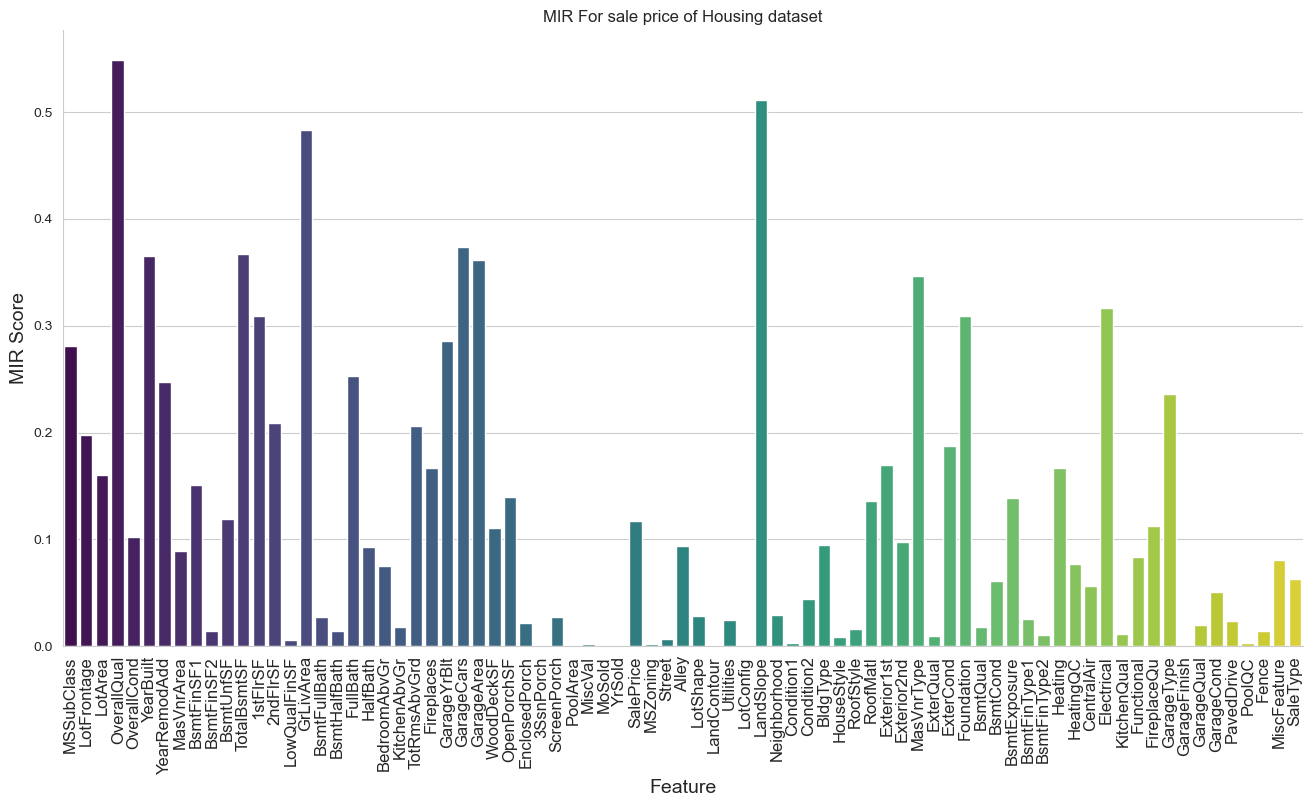

In [36]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)


sns.set_style('whitegrid')
ax = sns.barplot(x='Features', y='mir_scores', data = housing_mir_scores, palette='viridis')
sns.despine()
plt.title("MIR For sale price of Housing dataset")
plt.xlabel("Feature", fontsize=14)
plt.ylabel("MIR Score", fontsize=14)
plt.xticks(rotation = 90, fontsize = 12)

####  ● Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

In [37]:
## Implementing the Kselect Best Algorithm to select Features with Highest MIR Score value... 
FinalHousingDataFrame.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'El

In [38]:
X_Kbest_Housing = FinalHousingDataFrame[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']]

In [39]:
y_Kbest_Housing = FinalHousingDataFrame['SalePrice']

In [43]:
# split data in training and test set
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_Kbest_Housing, y_Kbest_Housing, test_size=0.2, random_state=42)

In [44]:
print("Number of Features before SelectKBest:", X_train_housing.shape[1])

Number of Features before SelectKBest: 75


####  ● Choose an appropriate value of K (number of features to select) for the analysis.

In [45]:
selectKBestHousingObj = SelectKBest(k=10, score_func=mutual_info_regression)
selectKBestHousingObj.fit(X_train_housing, y_train_housing)


SelectKBest(score_func=<function mutual_info_regression at 0x1215387c0>)

####  ● Fit the feature selection model on the dataset and transform the feature matrix accordingly.

####  ● Print the names or indices of the selected features.

In [46]:
kBestHousingColumnIndex = selectKBestHousingObj.get_support(indices=True)
kBestHousingColumnIndex

array([ 3,  5, 11, 15, 25, 26, 43, 53, 56, 65])

In [47]:
dataFrameWithNewHousingColumns = FinalHousingDataFrame.iloc[:,kBestHousingColumnIndex]
dataFrameWithNewHousingColumns

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,LotConfig,Exterior2nd,ExterCond,CentralAir
0,7,2003,856,1710,2,548,4,13,4,1
1,6,1976,1262,1262,2,460,2,8,4,1
2,7,2001,920,1786,2,608,4,13,4,1
3,7,1915,756,1717,3,642,0,15,4,1
4,8,2000,1145,2198,3,836,2,13,4,1
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,953,1647,2,460,4,13,4,1
1456,6,1978,1542,2073,2,500,4,10,4,1
1457,7,1941,1152,2340,1,252,4,5,2,1
1458,5,1950,1078,1078,1,240,4,8,4,1


####  ● Separate the features (X) and the target variable (y: house prices) from the dataset.

In [48]:
dataFrameWithNewHousingColumns.columns
## dataset with Columns having Highest MIR score, after implementing KBestSelect

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'LotConfig', 'Exterior2nd', 'ExterCond', 'CentralAir'],
      dtype='object')

####  ● Split the dataset into training and testing sets using an 80:20 ratio.

In [49]:
X_Housing_MultiLinear = dataFrameWithNewHousingColumns[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'LotConfig', 'Exterior2nd', 'ExterCond', 'CentralAir']]
# iv should always be 2d

In [50]:
Y_Housing_MultiLinear = FinalHousingDataFrame['SalePrice']

####  ● Fit a linear regression model to the training data using the LinearRegression class from the sklearn.linear_model module.

In [51]:
X_train_multi,X_test_multi,y_train_multi,y_test_multi = train_test_split(X_Housing_MultiLinear, Y_Housing_MultiLinear, test_size=0.2)

In [52]:
X_train_multi.shape

(1168, 10)

In [53]:
X_test_multi.shape

(292, 10)

####  ● Predict house prices for the testing data using the trained model.

In [54]:
Ml_reg = LinearRegression()

In [55]:
Ml_reg.fit(X_train_multi,y_train_multi)

LinearRegression()

In [56]:
y_pred_multi = Ml_reg.predict(X_test_multi)

In [57]:
y_pred_multi

array([108146.71177341, 233193.32210304, 176564.61373935, 195659.19773942,
       103557.77127147, 241671.0830975 , 118518.05443769, 175736.66559032,
       175550.89106137, 126240.01453494, 132268.57425941, 248683.35204155,
       105545.58806652, 108091.23719486, 113938.34006358, 117168.17715439,
       256181.9432474 , 177634.1703185 ,  25956.21630108, 204505.19522414,
       184547.45730673, 256810.57639943, 226356.89782207, 155290.33624376,
       201956.54758029, 140736.82410265, 211813.55128058, 175927.88109573,
       191070.13537363, 118790.68776374, 251863.3606025 ,  99725.67945596,
       152292.96582452, 137469.41808127,  96933.51678931, 243675.01440155,
       116782.57723052, 311349.39677812,  83758.33149524, 194879.80521256,
       156346.57617481, 260263.12329449, 120747.30606109, 140794.05271609,
       138079.81197493, 185961.03376999, 161583.59044799, 172885.4450321 ,
       181907.54059115, 189409.57286962,  46422.61267531, 104244.51105902,
       203312.42960151, 3

####  ● Evaluate the performance of the model by calculating the mean squared error (MSE) and the coefficient of determination (R^2) using appropriate functions from the sklearn.metrics module.

In [58]:
# for checking the error we will use either mean_Squared_error or mean_absolute_error
print(f"The mse is {mean_squared_error(y_pred_multi,y_test_multi)}")
print(f"The mae is {mean_absolute_error(y_pred_multi,y_test_multi)}")

The mse is 1179304872.6917963
The mae is 22926.826079402144


####  ● Print the MSE and R^2 values to assess the model's accuracy.`

In [59]:
print(f'The accuracy is {r2_score(y_test_multi,y_pred_multi)}')

The accuracy is 0.7741931162721094


####  ● Plot a scatter plot between the predicted house prices and the actual house prices for the testing data using the matplotlib library.

In [60]:
len(y_test_multi)

292

In [61]:
len(y_pred_multi)

292

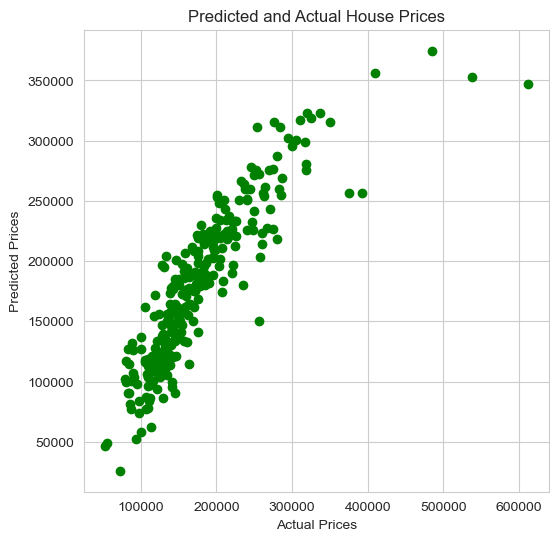

In [62]:
# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test_multi, y_pred_multi, color='green')
plt.title('Predicted and Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)